<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/2Classification_RupeshThapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the lab for classification.
## Creating a machine learning model for finding a image and training it from a MNIST Dataset.

### Importing datasets from the library sklearn

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### After fetching data from mnist i.e. 70000 images of numbers. We import a matplotlib library of python to create plot graph and design a shape that we want.


In [ ]:
x,y = mnist["data"],mnist["target"]

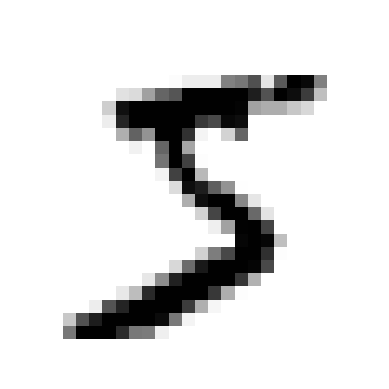

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(list(x.iloc[0,:]))
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


###Checking the class

In [ ]:
y[0]

5

###Splitting the data in equal half for testing and training

In [ ]:
y=y.astype(np.uint8)
x_train, x_test, y_train, y_test = x[:35000], x[35000:], y[:35000], y[35000:]

##Binary Classifier
###Create two class i.e 5 and Not 5

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

###Stochastic Gradient Descent (SGD) classifier is used for training binary classifier

###Scikit-Learn library is used for the training

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

### After training is complete, Classifier determines what the image represents



In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

### Cross-Validation is the performance measurement technique and the below code is provided as function by Sci-Kit Learn Library.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96622954, 0.96494386, 0.96339791])

### Below is the manual implementation code of Cross-Validation.



In [ ]:
print(x_train.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train.loc[train_index, :]
  y_train_folds = y_train_5.loc[train_index]
  x_test_fold = x_train.loc[test_index, :]
  y_test_fold = y_train_5.loc[test_index]

  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred = clone_clf.predict(x_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9568869460872547
0.9663152481357675
0.9643408194753986


## Confusion Matrix
### Predictions can be obtained from actual targets or by using cross_Val_predict function.
### Function uses K-folds cross-validation to predict output values in each test fold

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

### Import confusion_matrix function from sci-kit
### Each row is a class and each column is a predicted class
### First row is negative class and second row is positive class

#### 31279 correctly classified as non-5(true negatives)
#### 571 wrongly classified as 5 (false positives)
#### 659 wrongly classified as non-5 (false negatives)
#### 2491 were correctly classified as 5 (true positives)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[31279,   571],
       [  659,  2491]])

## Error Analysis

### Analyzing the confusion matrix gives insights into ways to improve the classifier

### The code is used for analysis to improve classifier

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[3295,    1,   12,   40,    5,    9,   19,    1,   43,    9],
       [   2, 3820,   26,   64,    5,   17,    2,    7,   52,    7],
       [  73,   65, 2840,  177,   40,   10,   42,   33,  139,   15],
       [  53,   14,   75, 3092,   13,   95,   15,   30,  133,   56],
       [  19,   14,   29,   30, 2998,   23,   36,   14,   86,  161],
       [  73,   15,   26,  248,   60, 2439,   50,   13,  189,   37],
       [  54,   18,   52,    5,   35,   55, 3170,    0,   74,    2],
       [  17,   18,   51,   98,   40,    6,    2, 3190,   46,  164],
       [  57,   88,   57,  255,   29,   90,   27,    9, 2700,   61],
       [  42,   11,   17,  147,  182,   39,    1,  157,  123, 2805]])